Click this image for dataset

<a href = "https://www.kaggle.com/datasets/primaryobjects/voicegender">
<img src = "https://png.pngtree.com/element_our/20190602/ourmid/pngtree-2-5d-flat-color-data-image_1386416.jpg" width = "100" height = "100">
</a>

In [1]:
## Extracting the csv file from zip file

import zipfile
file = zipfile.ZipFile("data.zip")
file.extractall()
file.close()

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape

(3168, 21)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


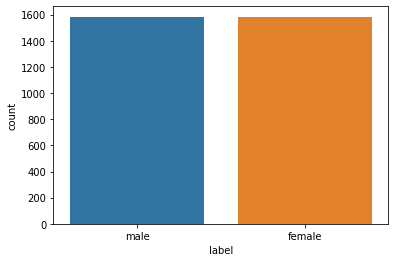

In [7]:
## Checking the bias of data
sns.countplot(df['label'])

In [9]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [10]:
## Checking the nan values
df.isna().any()

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

In [13]:
## Checking the duplicate values
df.duplicated().any()

True

In [14]:
df[df.duplicated()]

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
298,0.213732,0.057705,0.242573,0.141701,0.257984,0.116283,2.113598,7.890927,0.859712,0.084934,...,0.213732,0.133667,0.028319,0.253968,0.818125,0.132812,4.164062,4.031250,0.229051,male
2403,0.212190,0.043190,0.215153,0.188957,0.245644,0.056687,1.862573,6.109790,0.877669,0.314398,...,0.212190,0.139942,0.047198,0.279070,1.925551,0.023438,15.609375,15.585938,0.121344,female


In [16]:
## There are two row with duplicated one of male and another of female
## Drop the duplicated row
df.drop_duplicates(keep = 'first', inplace = True)

In [17]:
df.duplicated().any()

False

In [19]:
## Describing the data into 2 parts
df[df.columns[:10]].describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.180886,0.057130,0.185593,0.140440,0.224748,0.084308,3.140895,36.587139,0.895144,0.408348
std,0.029916,0.016656,0.036354,0.048687,0.023636,0.042790,4.241768,134.969236,0.044988,0.177476
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876
25%,0.163649,0.041942,0.169578,0.111086,0.208740,0.042538,1.649353,5.666817,0.861823,0.258126
50%,0.184814,0.059162,0.190016,0.140255,0.225668,0.094280,2.197623,8.327893,0.901823,0.396472
75%,0.199118,0.067023,0.210588,0.175931,0.243640,0.114168,2.932527,13.649803,0.928717,0.533795
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936


In [21]:
df[df.columns[10:]].describe()

,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000,3166.000000
mean,0.165248,0.180886,0.142811,0.036801,0.258837,0.828868,0.052631,5.044220,4.991589,0.173751
std,0.077212,0.029916,0.032314,0.019225,0.030085,0.525009,0.063301,3.517226,3.516072,0.119484
min,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.118008,0.163649,0.116990,0.018223,0.253968,0.419640,0.007812,2.070312,2.041016,0.099726
50%,0.186530,0.184814,0.140585,0.046110,0.271186,0.765625,0.023438,4.992188,4.945312,0.139357
75%,0.221070,0.199118,0.169605,0.047904,0.277457,1.176824,0.070312,7.005859,6.992188,0.209141
max,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


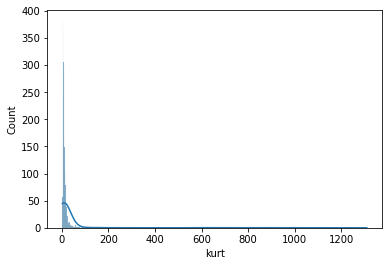

In [22]:
# Kurt seems to have some outliers
sns.histplot(df['kurt'], kde = True,)

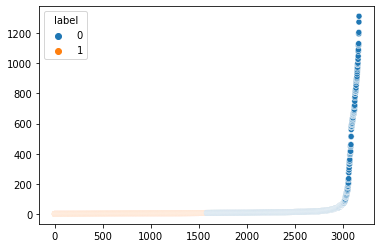

In [40]:
## kurt is highly right skewed
val = df['kurt'].sort_values(ascending = True).values
sns.scatterplot(y = val, x = range(len(val)), hue = df['label'])

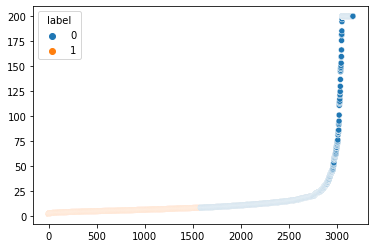

In [54]:
## having the high kurt means female voice
## But no male voice have kurt more than around 200
## We can make it like if kurt is more than 200 consider it as 200

df['kurt'] = df['kurt'].apply(lambda x : x if x < 200 else 200)
val = df['kurt'].sort_values(ascending = True).values
sns.scatterplot(y = val, x = range(len(val)), hue = df['label'])

In [36]:
## Mapping the label 

# 1 : male
# 0 : Female

df['label'] = df['label'].map({'male': 1, 'female':0})


In [37]:
df['label'].unique()

array([1, 0])

In [55]:
## Splitting the data into the independent and dependent vairables

X = df.drop('label', axis = 1)
y = df['label']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


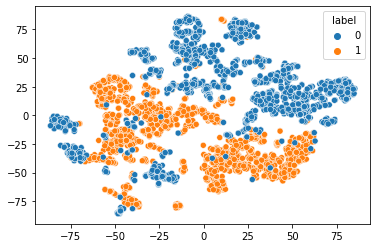

In [66]:
## Let's do some dimensionality reduction thing

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

tsne = TSNE(n_components=2, perplexity=15)
tsne_data = tsne.fit_transform(X_scaled)

c1 = tsne_data[:, 0]
c2 = tsne_data[:, 1]

sns.scatterplot(x = c1, y = c2, hue = y)


In [67]:
## Here everything seems to be overlapped.
## Let's try PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


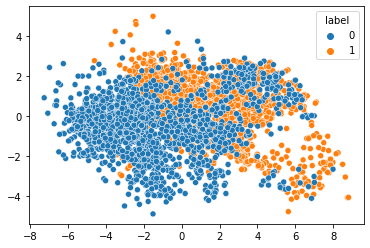

In [68]:
c1 = pca_data[:,0]
c2 = pca_data[:, 1]
sns.scatterplot(c1, c2, hue = y)

In [59]:
## Let's do some machine learning algorithm
## Train and test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
## Standerdising the data into mean = 0, std = 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
## Importing the metrics parameters
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
## Using the Logistic regression first
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("Model accuracy : ", accuracy_score(pred, y_test))
print("Confusion matrix : \n", confusion_matrix(pred, y_test))
print("Classification report : \n", classification_report(y_test, pred))

Model accuracy :  0.973186119873817
Confusion matrix : 
 [[290   6]
 [ 11 327]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       301
           1       0.97      0.98      0.97       333

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [65]:
## Try using the random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("Model accuracy : ", accuracy_score(pred, y_test))
print("Confusion matrix : \n", confusion_matrix(pred, y_test))
print("Classification report : \n", classification_report(y_test, pred))

Model accuracy :  0.9826498422712934
Confusion matrix : 
 [[295   5]
 [  6 328]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       301
           1       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



Done


In [76]:
## SVM
from sklearn.svm import SVC

model = SVC()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("Model accuracy : ", accuracy_score(pred, y_test))
print("Confusion matrix : \n", confusion_matrix(pred, y_test))
print("Classification report : \n", classification_report(y_test, pred))

Model accuracy :  0.9826498422712934
Confusion matrix : 
 [[295   5]
 [  6 328]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       301
           1       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [77]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("Model accuracy : ", accuracy_score(pred, y_test))
print("Confusion matrix : \n", confusion_matrix(pred, y_test))
print("Classification report : \n", classification_report(y_test, pred))


Model accuracy :  0.9858044164037855
Confusion matrix : 
 [[297   5]
 [  4 328]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       0.99      0.98      0.99       333

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [79]:
## Combining the three model together
## RF, xgboost, svm

class Model:
    def __init__(self):
        self.rf = RandomForestClassifier()
        self.svc = SVC()
        self.xg = XGBClassifier()
        print("Model loaded")
    
    def fit(self, X_train, y_train):
        self.rf.fit(X_train, y_train)
        self.svc.fit(X_train, y_train)
        self.xg.fit(X_train, y_train)
        print("Model is trainded")

    def predict(self, X_test):
        rf_pred = self.rf.predict(X_test)
        svc_pred = self.svc.predict(X_test)
        xg_pred = self.xg.predict(X_test)

        return self.__pred(rf_pred, svc_pred, xg_pred)

    def __pred(self, a, b, c):
        pred = []
        for i, j, k in zip(a, b, c):
            if i+j+k >=2 :
                pred.append(1)
            else:
                pred.append(0)
        return np.array(pred)


In [81]:
model = Model()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

print("Model accuracy : ", accuracy_score(pred, y_test))
print("Confusion matrix : \n", confusion_matrix(pred, y_test))
print("Classification report : \n", classification_report(y_test, pred))

Model loaded
Model is trainded
Model accuracy :  0.9826498422712934
Confusion matrix : 
 [[296   6]
 [  5 327]]
Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       301
           1       0.98      0.98      0.98       333

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [83]:
## Saving this model using jolib

import joblib

joblib.dump(model, open("model.pkl", 'wb'))